In [25]:
#Program that uses artifical recurrent neural network, LSTM to predict stock closing prices 

In [26]:
#Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

!pip install --upgrade pandas-datareader
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
#Grab stock quote
sq = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
sq

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540044
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607441
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880666
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860232
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426819
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596107
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501350


In [28]:
sq.shape

(2003, 6)

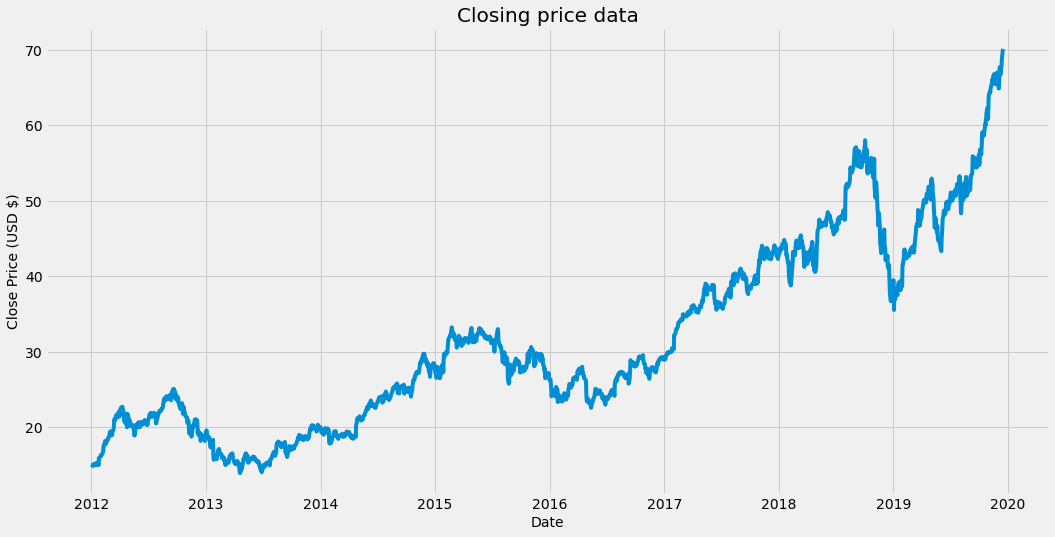

In [29]:
#Closing price data visual
plt.figure(figsize=(16,8))
plt.title('Closing price data')
plt.plot(sq['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD $)', fontsize=14)
plt.show()

In [30]:
#Create dataframe for close column
data = sq.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get num rows to train model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1603

In [31]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [32]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_traina nd y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  x_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805]), 0.13949272033425864]
[]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.

In [37]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
              0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
              0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
              0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
              0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
              0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
              0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
              0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
              0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
              0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
              0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
              0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805]),
       0.13949272033425864,
       array([0.01457063, 0.01748985, 0.02026915, 0.01984303, 0.02080338,
        

In [34]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

IndexError: ignored